In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
import os
import sys

sys.path.append(os.path.abspath('helper_functions/'))
from VisualizeGradingPerformanceFunctions import *


In [2]:
grade_result = pd.read_csv("training_set.csv", index_col=0)
grade_result = grade_result.sort_values('Grade').reset_index().drop('index',axis=1)
grade_result

FileNotFoundError: [Errno 2] No such file or directory: 'training_set.csv'

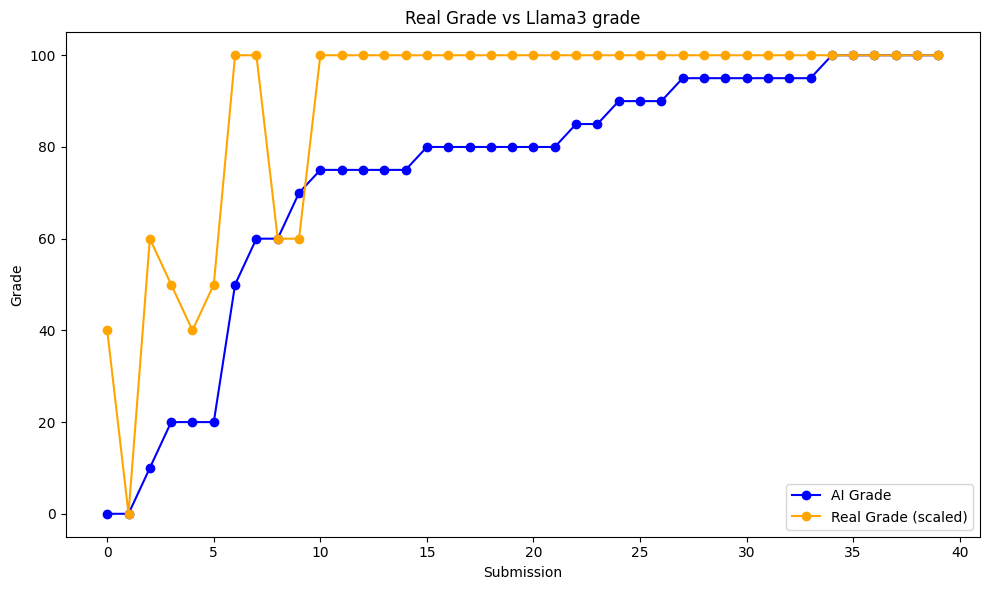

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grade_result.index, grade_result['Grade'], marker='o', label='AI Grade', color='blue')
plt.plot(grade_result.index, grade_result['RealGrade'], marker='o', label='Real Grade (scaled)', color='orange')

# Add labels and title
plt.xlabel('Submission')
plt.ylabel('Grade')
plt.title('Real Grade vs Llama3 grade')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
llms_consistency_record = pd.read_csv("LLMs Consistency Result.csv")
llms_consistency_record

,Prompt ID,Model,Section,Criteria,Grade,Pass,Runtime
0,6,Llama3,Description,describe the purpose for conducting the project,80,0,1
1,6,Llama3,Description,describe the purpose for conducting the project,60,0,2
2,6,Llama3,Description,describe the purpose for conducting the project,70,0,3
3,6,Llama3,Description,describe the purpose for conducting the project,80,0,4
4,6,Llama3,Description,describe the purpose for conducting the project,90,0,5
5,6,Llama3,Description,describe the purpose for conducting the project,95,0,6
6,6,Llama3,Description,describe the purpose for conducting the project,95,0,7
7,6,Llama3,Description,describe the purpose for conducting the project,100,0,8
8,6,Llama3,Description,describe the purpose for conducting the project,50,0,9
9,6,Llama3,Description,describe the purpose for conducting the project,75,0,10


In [ ]:
submission6_consitency = llms_consistency_record[(llms_consistency_record["Prompt ID"] == 6) & (llms_consistency_record['Section'] == "Description")]
submission6_consitency

,Prompt ID,Model,Section,Criteria,Grade,Pass,Runtime
0,6,Llama3,Description,describe the purpose for conducting the project,80,0,1
1,6,Llama3,Description,describe the purpose for conducting the project,60,0,2
2,6,Llama3,Description,describe the purpose for conducting the project,70,0,3
3,6,Llama3,Description,describe the purpose for conducting the project,80,0,4
4,6,Llama3,Description,describe the purpose for conducting the project,90,0,5
5,6,Llama3,Description,describe the purpose for conducting the project,95,0,6
6,6,Llama3,Description,describe the purpose for conducting the project,95,0,7
7,6,Llama3,Description,describe the purpose for conducting the project,100,0,8
8,6,Llama3,Description,describe the purpose for conducting the project,50,0,9
9,6,Llama3,Description,describe the purpose for conducting the project,75,0,10


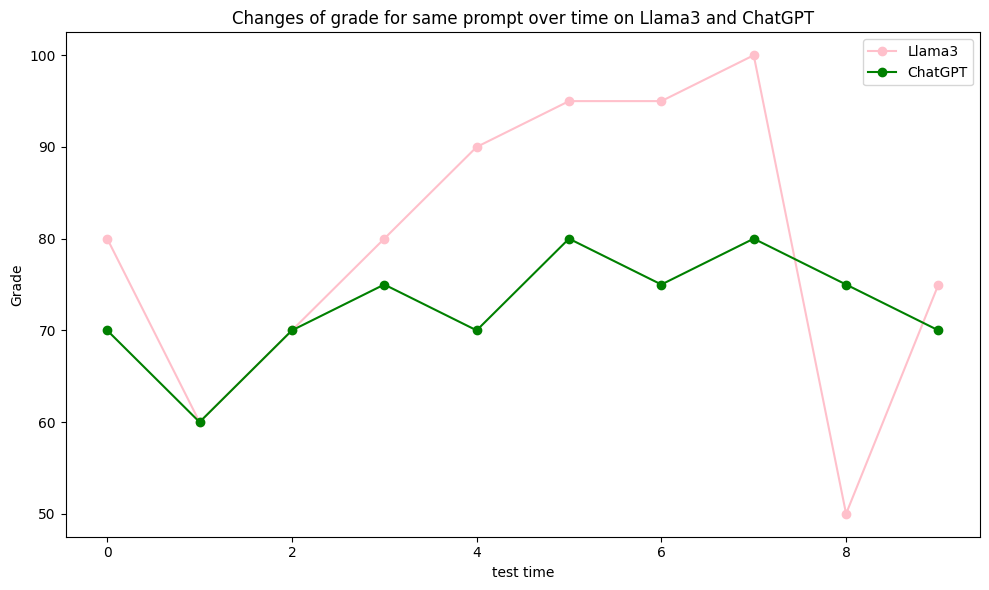

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(submission6_consitency[submission6_consitency["Model"]=="Llama3"].index, submission6_consitency[submission6_consitency["Model"]=="Llama3"]["Grade"], marker='o', label='Llama3', color='pink')
plt.plot(submission6_consitency[submission6_consitency["Model"]=="ChatGPT"].reset_index().index, submission6_consitency[submission6_consitency["Model"]=="ChatGPT"]["Grade"], marker='o', label='ChatGPT', color='green')

# Add labels and title
plt.xlabel('test time')
plt.ylabel('Grade')
plt.title('Changes of grade for same prompt over time on Llama3 and ChatGPT')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Analyze the performance of model on different prompt version

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
import os
import sys

sys.path.append(os.path.abspath('helper_functions/'))
from VisualizeGradingPerformanceFunctions import *

## Prompt version 4

Accuracy: 0.71
Precision: 0.71
Recall: 0.96
F1 score: 0.81
[[ 6 18]
 [ 2 44]]


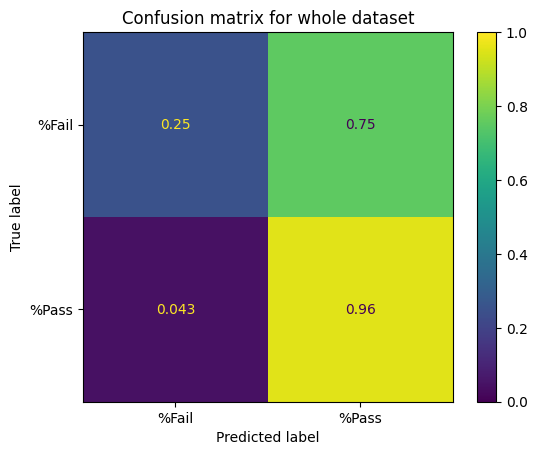

There are 14 Descriptions in 14 submissions
9 Description failed
5 Description passed
Accuracy: 0.57
Precision: 0.44
Recall: 0.80
F1 score: 0.57


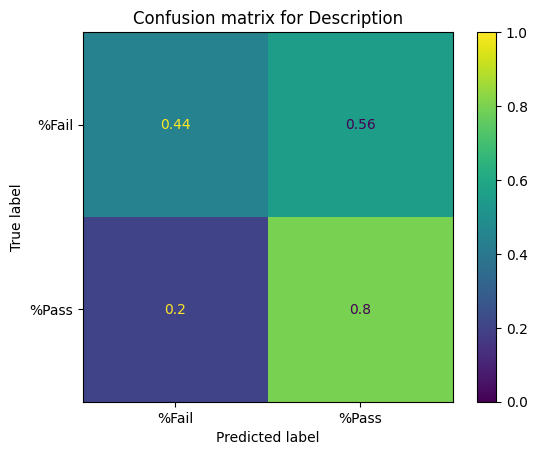

There are 14 Overviews in 14 submissions
3 Overview failed
11 Overview passed
Accuracy: 0.71
Precision: 0.77
Recall: 0.91
F1 score: 0.83


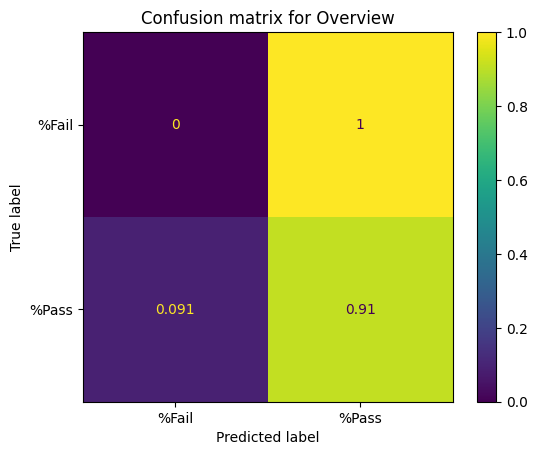

There are 14 Scopes in 14 submissions
3 Scope failed
11 Scope passed
Accuracy: 0.86
Precision: 0.85
Recall: 1.00
F1 score: 0.92


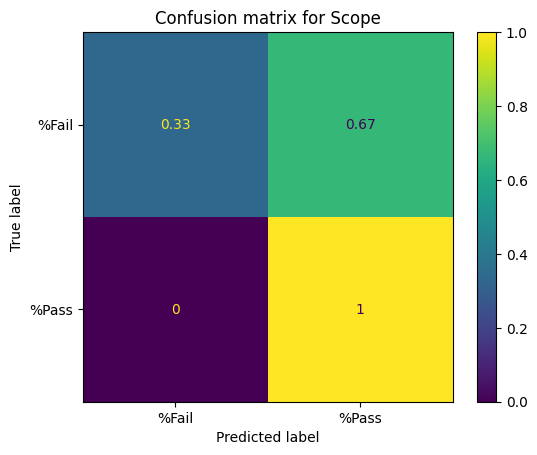

There are 14 Teams in 14 submissions
5 Team failed
9 Team passed
Accuracy: 0.71
Precision: 0.69
Recall: 1.00
F1 score: 0.82


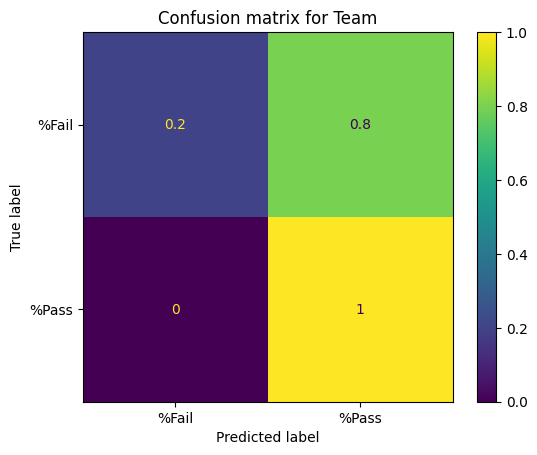

There are 14 Timelines in 14 submissions
4 Timeline failed
10 Timeline passed
Accuracy: 0.71
Precision: 0.71
Recall: 1.00
F1 score: 0.83


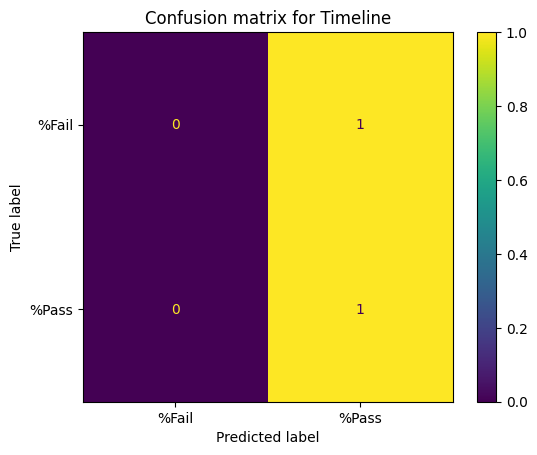

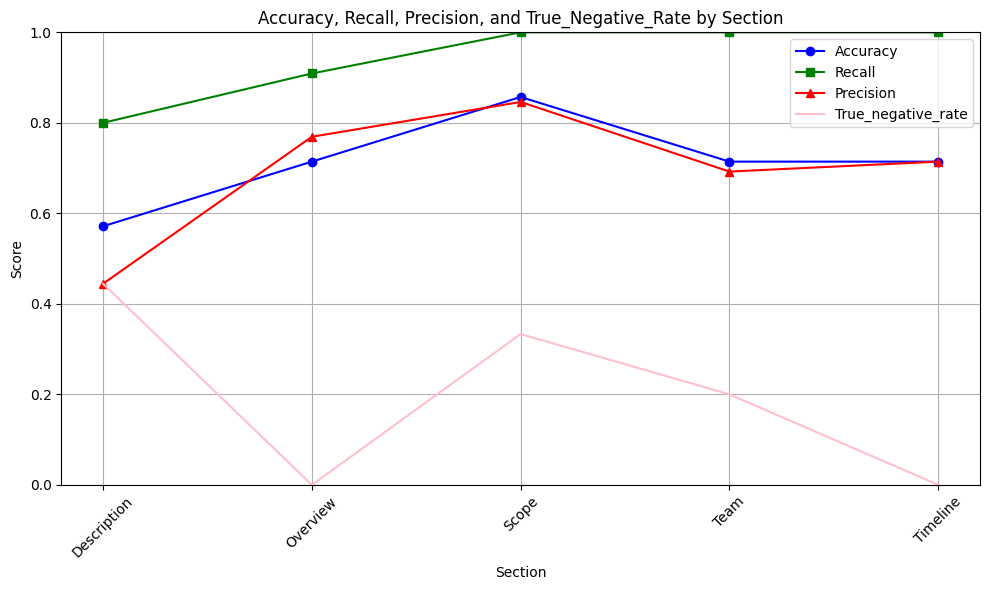

In [ ]:
test_result_path = "test_results/test_result_on_14_submissions_prompts_v4.csv"
real_result_path = "real_results/y_test_df.csv"

creator = TrainingResultCreator(test_result_path, real_result_path)
training_result_df = creator.create_training_result_df()
test_result_section = ModelResultAnalyzer(training_result_df)
test_result_section.plot_confusion_matrix()
test_result_section.visualize_all_sections()

## Prompt version 5

Accuracy: 0.69
Precision: 0.71
Recall: 0.89
F1 score: 0.79
[[ 7 17]
 [ 5 41]]


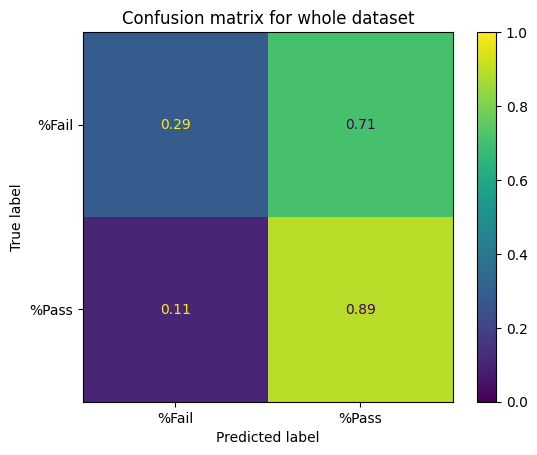

There are 14 Descriptions in 14 submissions
9 Description failed
5 Description passed
Accuracy: 0.50
Precision: 0.40
Recall: 0.80
F1 score: 0.53


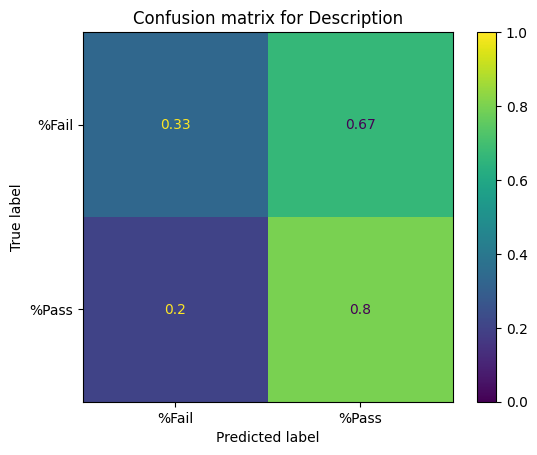

There are 14 Overviews in 14 submissions
3 Overview failed
11 Overview passed
Accuracy: 0.57
Precision: 0.73
Recall: 0.73
F1 score: 0.73


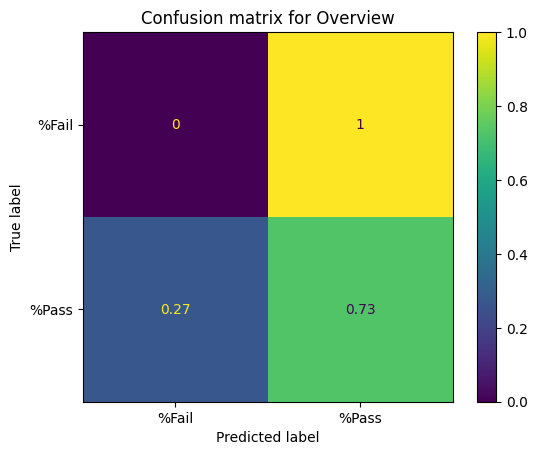

There are 14 Scopes in 14 submissions
3 Scope failed
11 Scope passed
Accuracy: 0.86
Precision: 0.91
Recall: 0.91
F1 score: 0.91


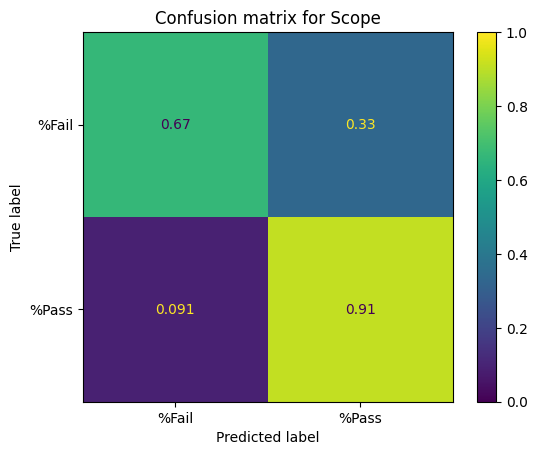

There are 14 Teams in 14 submissions
5 Team failed
9 Team passed
Accuracy: 0.71
Precision: 0.69
Recall: 1.00
F1 score: 0.82


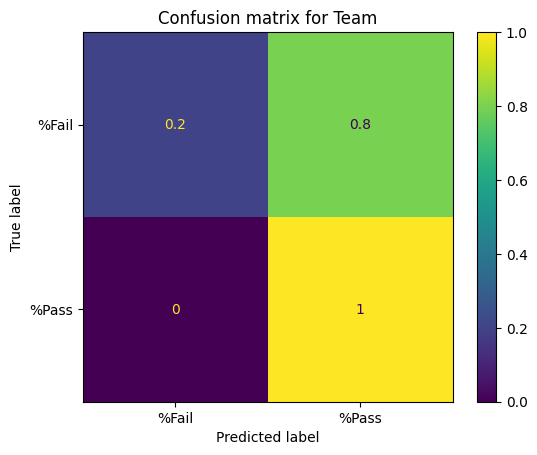

There are 14 Timelines in 14 submissions
4 Timeline failed
10 Timeline passed
Accuracy: 0.79
Precision: 0.77
Recall: 1.00
F1 score: 0.87


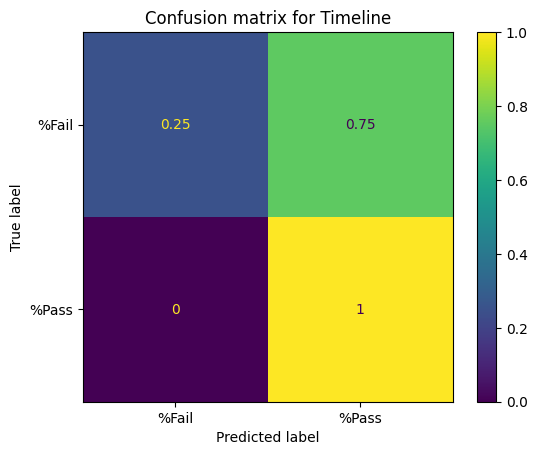

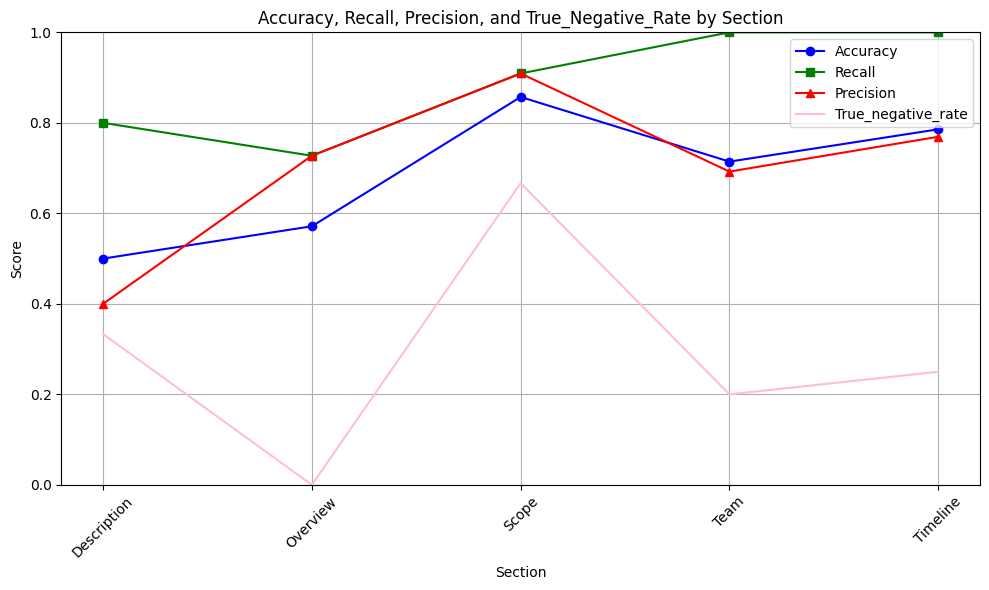

In [ ]:
test_result_path = "test_results/test_result_on_14_submissions_prompts_v5_criteriadict2.csv"
real_result_path = "real_results/y_test_df.csv"

creator = TrainingResultCreator(test_result_path, real_result_path)
training_result_df = creator.create_training_result_df()
test_result_section = ModelResultAnalyzer(training_result_df)
test_result_section.plot_confusion_matrix()
test_result_section.visualize_all_sections()

## Prompt version 6

Accuracy: 0.71
Precision: 0.71
Recall: 0.96
F1 score: 0.81
[[ 6 18]
 [ 2 44]]


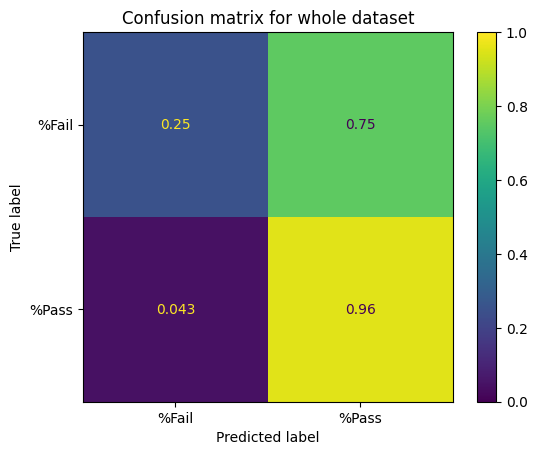

There are 14 Descriptions in 14 submissions
9 Description failed
5 Description passed
Accuracy: 0.50
Precision: 0.40
Recall: 0.80
F1 score: 0.53


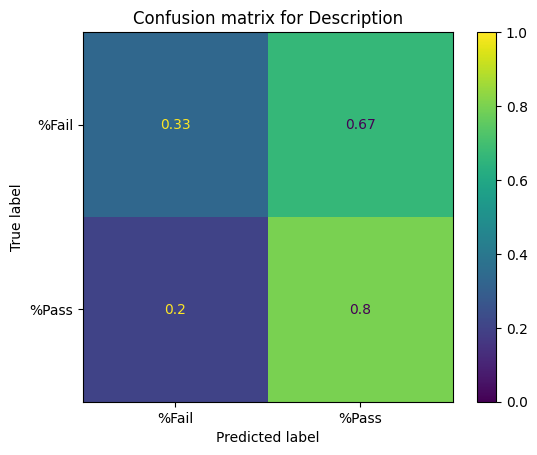

There are 14 Overviews in 14 submissions
3 Overview failed
11 Overview passed
Accuracy: 0.71
Precision: 0.77
Recall: 0.91
F1 score: 0.83


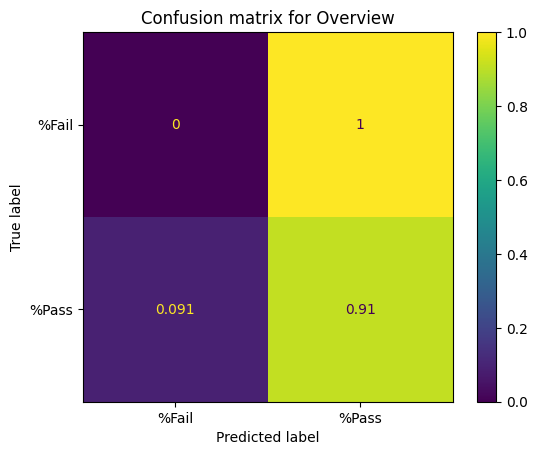

There are 14 Scopes in 14 submissions
3 Scope failed
11 Scope passed
Accuracy: 0.93
Precision: 0.92
Recall: 1.00
F1 score: 0.96


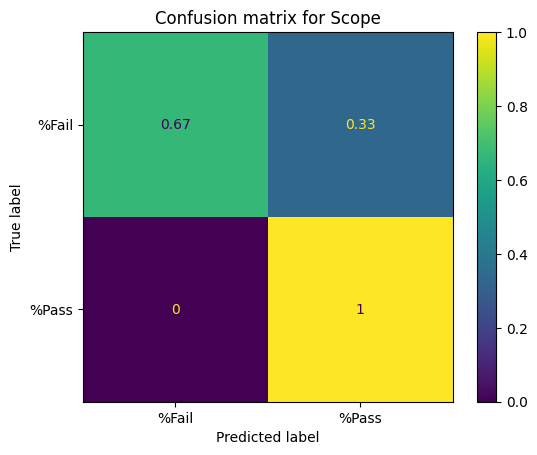

There are 14 Teams in 14 submissions
5 Team failed
9 Team passed
Accuracy: 0.71
Precision: 0.69
Recall: 1.00
F1 score: 0.82


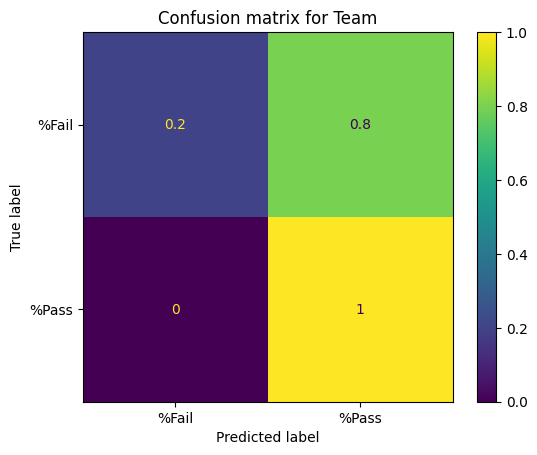

There are 14 Timelines in 14 submissions
4 Timeline failed
10 Timeline passed
Accuracy: 0.71
Precision: 0.71
Recall: 1.00
F1 score: 0.83


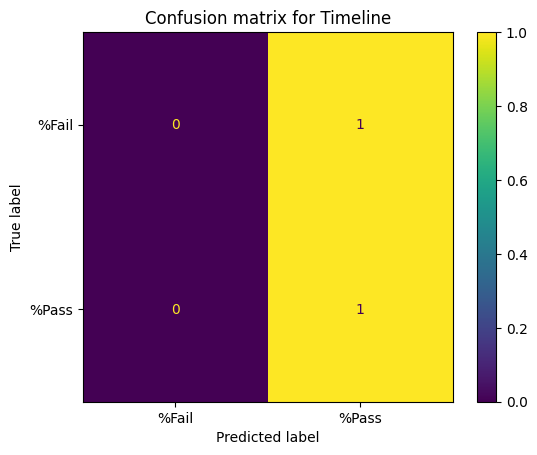

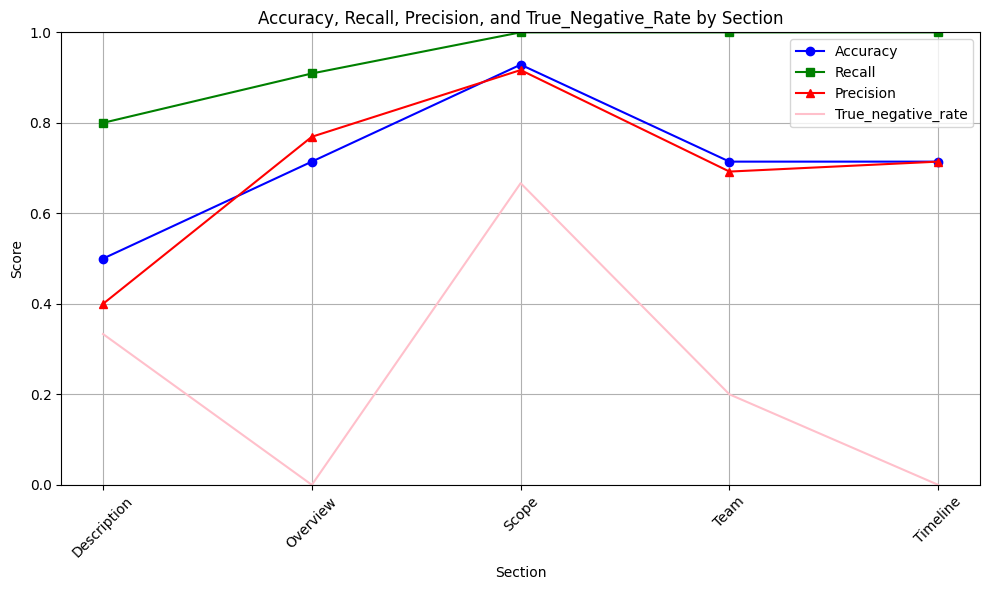

In [ ]:
test_result_path = "test_results/test_result_on_14_submissions_prompts_v6_criteriadict2.csv"
real_result_path = "real_results/y_test_df.csv"

creator = TrainingResultCreator(test_result_path, real_result_path)
training_result_df = creator.create_training_result_df()
test_result_section = ModelResultAnalyzer(training_result_df)
test_result_section.plot_confusion_matrix()
test_result_section.visualize_all_sections()

## Prompt version 7

Accuracy: 0.69
Precision: 0.69
Recall: 0.96
F1 score: 0.80
[[ 4 20]
 [ 2 44]]


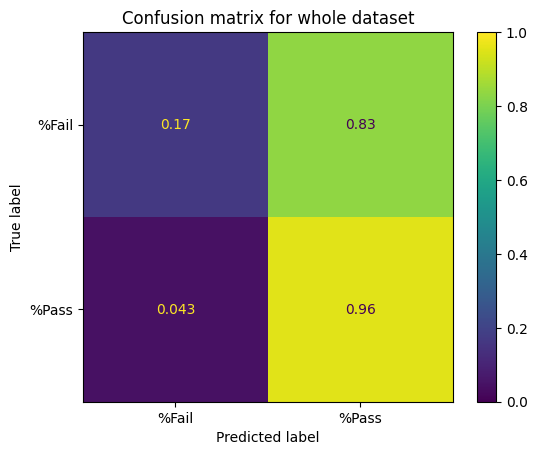

There are 14 Descriptions in 14 submissions
9 Description failed
5 Description passed
Accuracy: 0.43
Precision: 0.36
Recall: 0.80
F1 score: 0.50


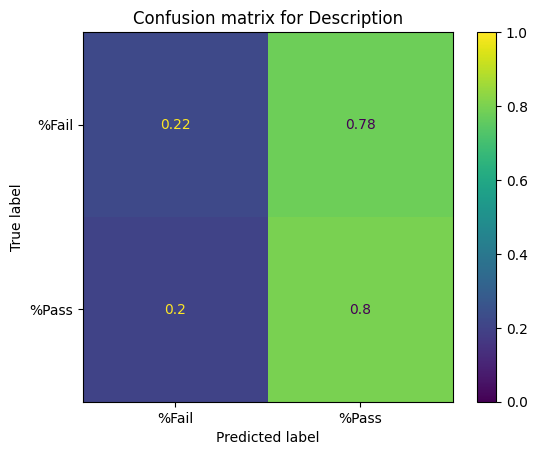

There are 14 Overviews in 14 submissions
3 Overview failed
11 Overview passed
Accuracy: 0.71
Precision: 0.77
Recall: 0.91
F1 score: 0.83


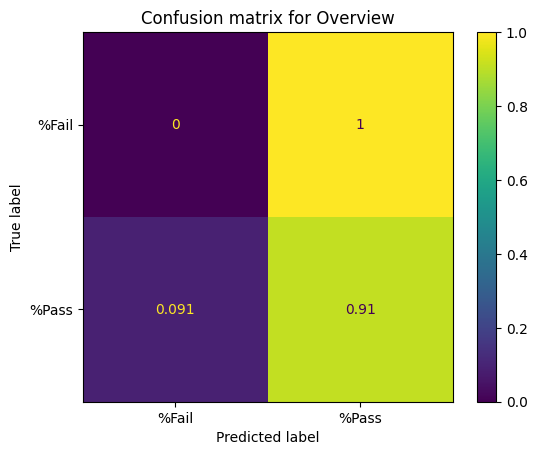

There are 14 Scopes in 14 submissions
3 Scope failed
11 Scope passed
Accuracy: 0.86
Precision: 0.85
Recall: 1.00
F1 score: 0.92


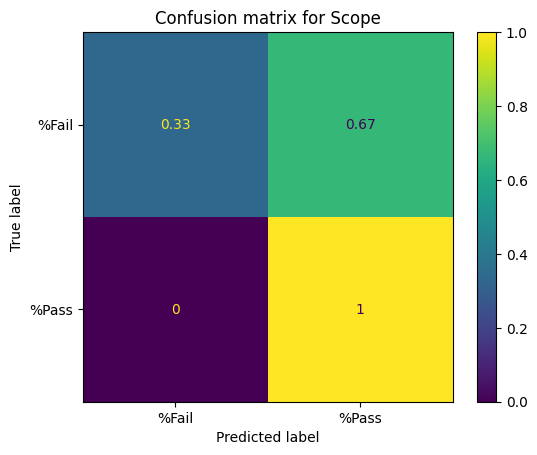

There are 14 Teams in 14 submissions
5 Team failed
9 Team passed
Accuracy: 0.71
Precision: 0.69
Recall: 1.00
F1 score: 0.82


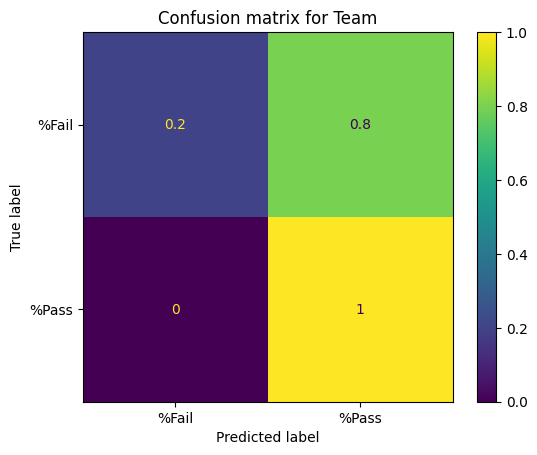

There are 14 Timelines in 14 submissions
4 Timeline failed
10 Timeline passed
Accuracy: 0.71
Precision: 0.71
Recall: 1.00
F1 score: 0.83


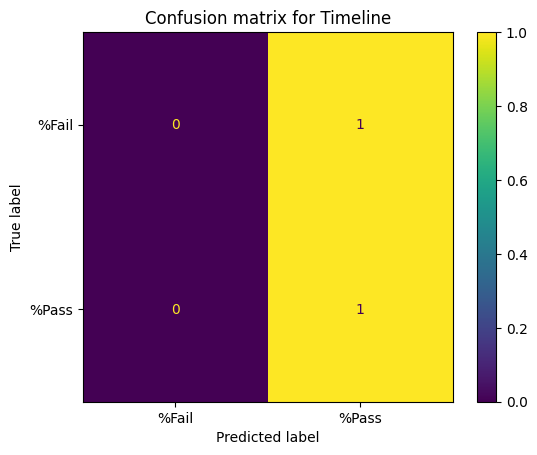

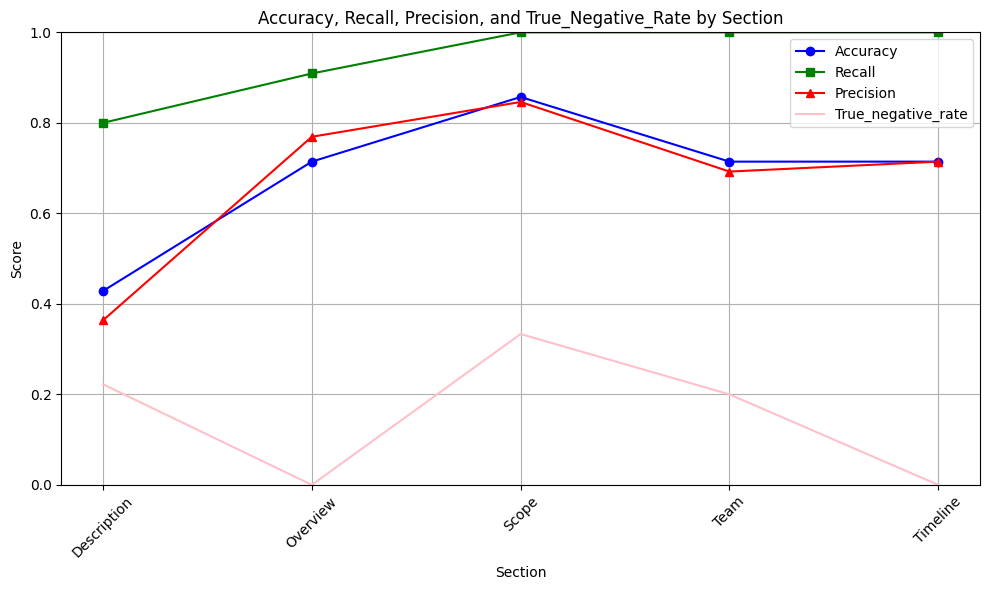

In [ ]:
test_result_path = "test_results/test_result_on_14_submissions_prompts_v7_criteriadict2.csv"
real_result_path = "real_results/y_test_df.csv"

creator = TrainingResultCreator(test_result_path, real_result_path)
training_result_df = creator.create_training_result_df()
test_result_section = ModelResultAnalyzer(training_result_df)
test_result_section.plot_confusion_matrix()
test_result_section.visualize_all_sections()

## Prompt version 8

Accuracy: 0.70
Precision: 0.70
Recall: 0.96
F1 score: 0.81
[[ 5 19]
 [ 2 44]]


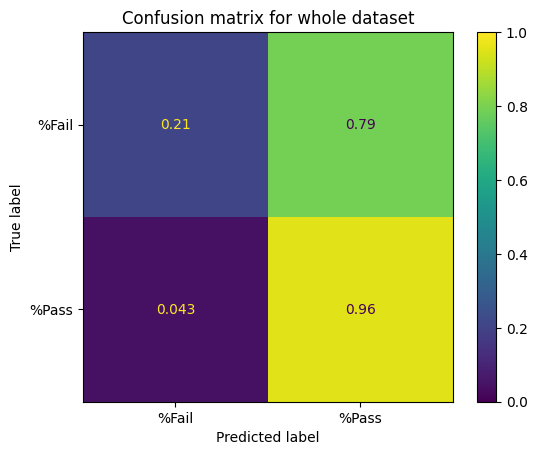

There are 14 Descriptions in 14 submissions
9 Description failed
5 Description passed
Accuracy: 0.43
Precision: 0.36
Recall: 0.80
F1 score: 0.50


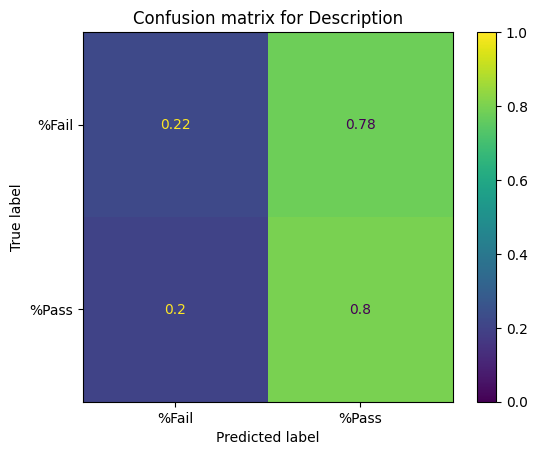

There are 14 Overviews in 14 submissions
3 Overview failed
11 Overview passed
Accuracy: 0.71
Precision: 0.77
Recall: 0.91
F1 score: 0.83


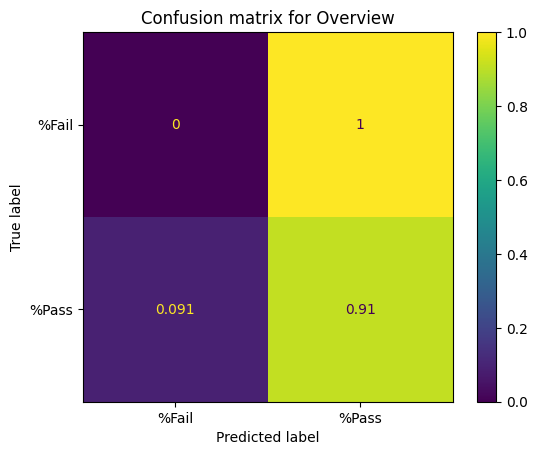

There are 14 Scopes in 14 submissions
3 Scope failed
11 Scope passed
Accuracy: 0.93
Precision: 0.92
Recall: 1.00
F1 score: 0.96


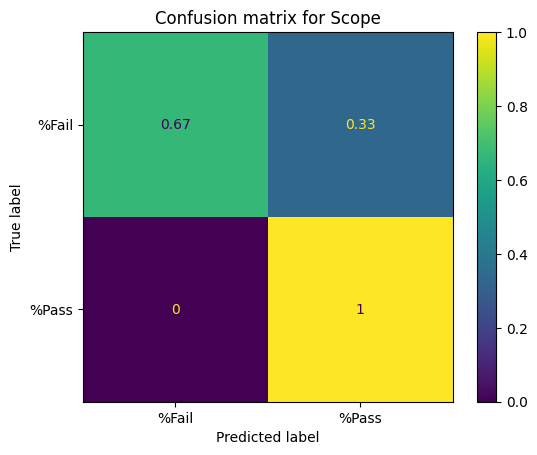

There are 14 Teams in 14 submissions
5 Team failed
9 Team passed
Accuracy: 0.71
Precision: 0.69
Recall: 1.00
F1 score: 0.82


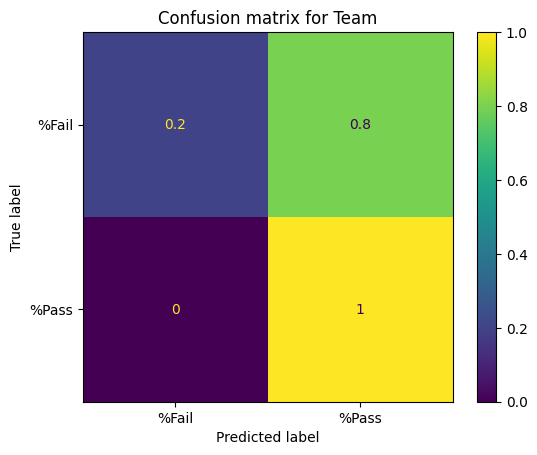

There are 14 Timelines in 14 submissions
4 Timeline failed
10 Timeline passed
Accuracy: 0.71
Precision: 0.71
Recall: 1.00
F1 score: 0.83


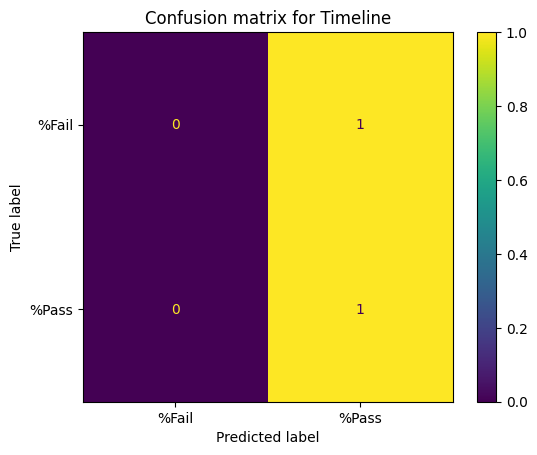

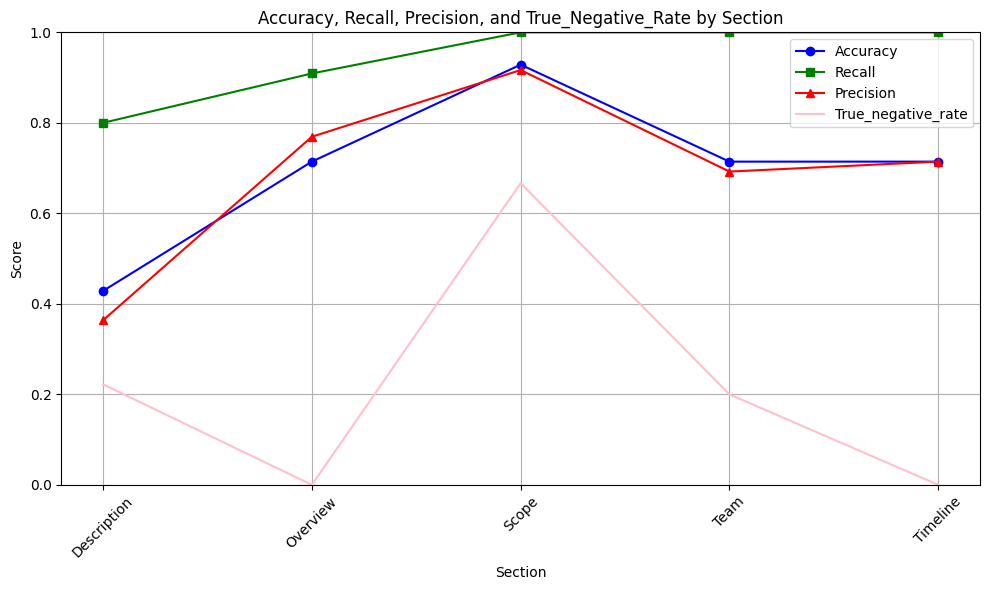

In [ ]:
test_result_path = "test_results/submission_results_prompt_v8_criteria_v2.csv"
real_result_path = "real_results/y_test_df.csv"

creator = TrainingResultCreator(test_result_path, real_result_path)
training_result_df = creator.create_training_result_df()
test_result_section = ModelResultAnalyzer(training_result_df)
test_result_section.plot_confusion_matrix()
test_result_section.visualize_all_sections()

Same_result
True     10
False     4
Name: count, dtype: int64


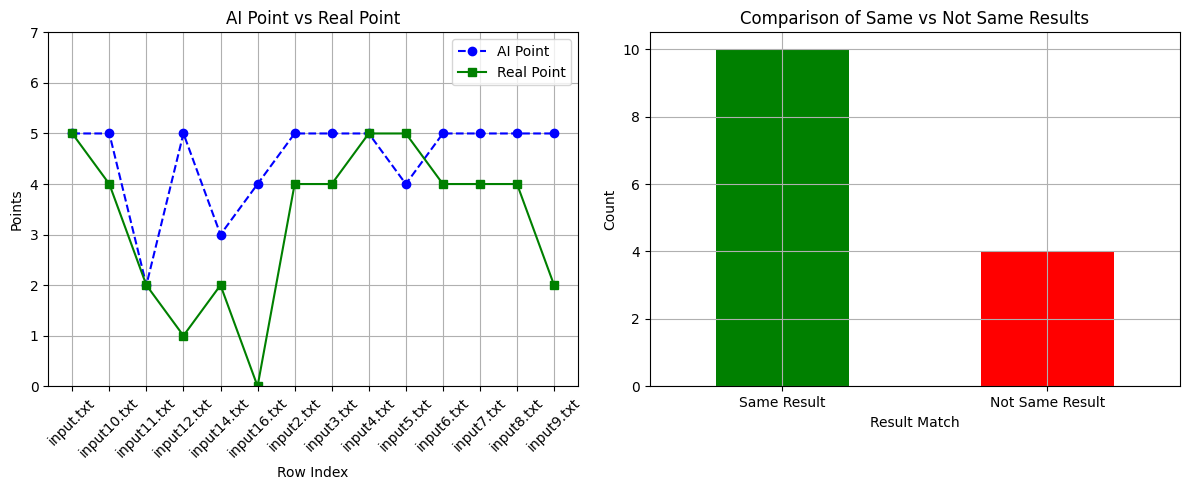

In [ ]:
grading_result = test_result_section.get_submission_grading_accuracy()

## Test result on 50 files

In [8]:
test_result = pd.read_csv("50_files_final_result_merged_with_real_result.csv")
test_result = test_result[['File_Name','AI_Grade','Comment',	'Section','score', 'long_description']]
test_result = test_result.rename(columns={
    'File_Name': 'filename',
    'score': 'Real_Grade',
    'long_description': 'Criteria'
})
test_result

,filename,AI_Grade,Comment,Section,Real_Grade,Criteria
0,24.06. 28 FINAL Project Charter TIPOP Colorado...,22,The value of the 'Project Name:' attribute exi...,Project Description,1.0,Includes a brief description of the project.<b...
1,24.06. 28 FINAL Project Charter TIPOP Colorado...,21,The problem summary provides a clear and logic...,Project Overview,1.0,Describes problem or performance gap with desc...
2,24.06. 28 FINAL Project Charter TIPOP Colorado...,17,The task list contains a comprehensive set of ...,Timeline,1.0,Lists each key task and planned completion dates.
3,240625 ADULT Project Charter TIPOP Depression ...,21,The value of the 'Project Name:' attribute exi...,Project Description,1.0,Includes a brief description of the project.<b...
4,240625 ADULT Project Charter TIPOP Depression ...,21,The problem summary includes a detailed and lo...,Project Overview,1.0,Describes problem or performance gap with desc...
...,...,...,...,...,...,...
150,TIP_BH_Adult_OP_-_Care_Coordinator_Charter,18,The value of the 'Project Name:' attribute exi...,Project Description,1.0,Includes a brief description of the project.<b...
151,TIP_BH_Adult_OP_-_Care_Coordinator_Charter,21,The problem summary provides a clear and logic...,Project Overview,1.0,Describes problem or performance gap with desc...
152,TIP_BH_Adult_OP_-_Care_Coordinator_Charter,8,The 'In Scope Project Objectives' attribute cl...,Project Scope,1.0,Explains objectives that are in scope.<br/>\r\...
153,TIP_BH_Adult_OP_-_Care_Coordinator_Charter,13,The value of the 'Team Lead:' attribute contai...,Project Team,1.0,Identifies:<br/>\r\n<br/>\r\n1. Team Lead<br/>...


# Analyze test result version 1

In [ ]:
training_result_df_v1 = pd.read_csv('test_results/test_result_on_14_submissions.csv')
training_result_df_v1 = training_result_df_v1[['filename','AI_Grade',	'Comment',	'Section',	'Criteria','Real_Grade']]
training_result_df_v1

,filename,AI_Grade,Comment,Section,Criteria,Real_Grade
0,auto_grading_trainingset\input_files\input.txt,100,Comment: This submission meets all the require...,Milestone,"include a brief description (Name,Clinic, Mile...",100
1,auto_grading_trainingset\input_files\input.txt,100,. Comment: This submission meets all the requi...,Description,"include a brief description (Name,Clinic, Mile...",100
2,auto_grading_trainingset\input_files\input.txt,90,Comment: Your submission provides a clear and ...,Description,describe the purpose for conducting the project,100
3,auto_grading_trainingset\input_files\input.txt,100,. Comment: This submission meets all the requi...,Description,describe what is expected to result from the p...,100
4,auto_grading_trainingset\input_files\input.txt,95,. Comment: The submission is well-structured a...,Overview,describe problems or performance gaps with des...,100
...,...,...,...,...,...,...
149,auto_grading_trainingset\input_files\input9.txt,80,. Comment: The submission is well-structured a...,Timeline,list each key task and planned completion dates,0
150,auto_grading_trainingset\input_files\input9.txt,75,. Comment: The submission shows improvement ov...,Timeline,include feasible and appropriate steps related...,0
151,auto_grading_trainingset\input_files\input9.txt,50,. Comment: The project scope submission is dec...,Scope,explain objectives that are in scope. These ob...,0
152,auto_grading_trainingset\input_files\input9.txt,50,. Comment: The project scope submission is dec...,Scope,describes objectives that are out of scope. It...,0


Accuracy: 0.68
Precision: 0.69
Recall: 0.93
F1 score: 0.79
[[ 5 23]
 [ 4 52]]


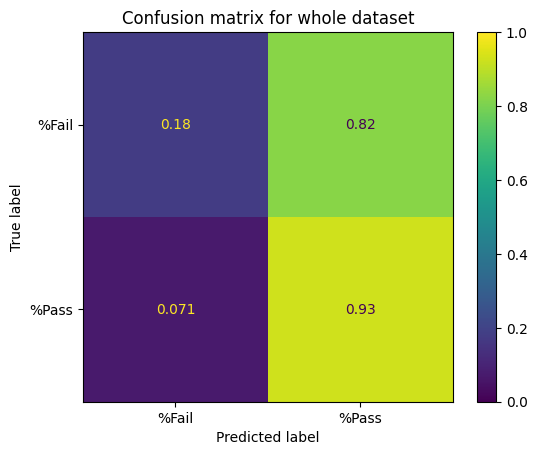

There are 14 Descriptions in 14 submissions
7 Description failed
7 Description passed
Accuracy: 0.50
Precision: 0.50
Recall: 0.71
F1 score: 0.59


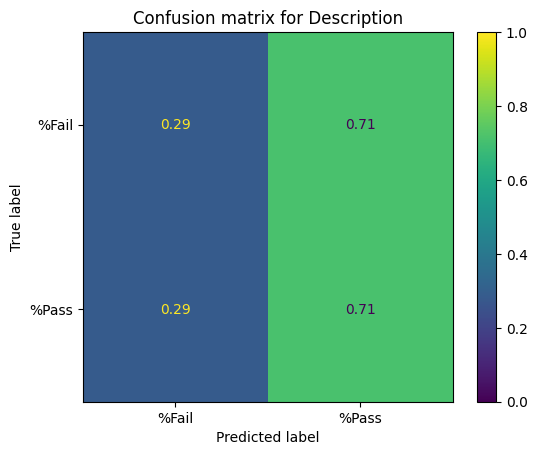

There are 14 Milestones in 14 submissions
5 Milestone failed
9 Milestone passed
Accuracy: 0.64
Precision: 0.64
Recall: 1.00
F1 score: 0.78


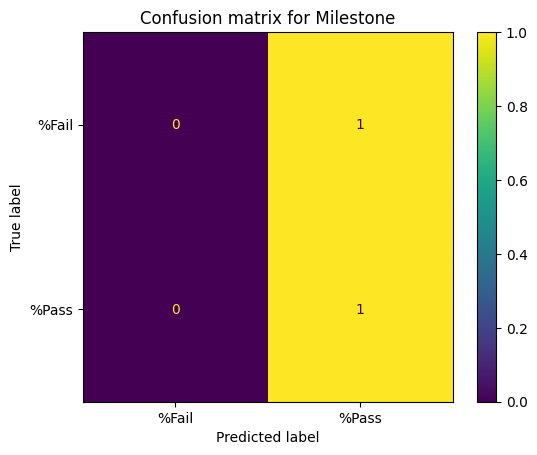

There are 14 Overviews in 14 submissions
4 Overview failed
10 Overview passed
Accuracy: 0.71
Precision: 0.71
Recall: 1.00
F1 score: 0.83


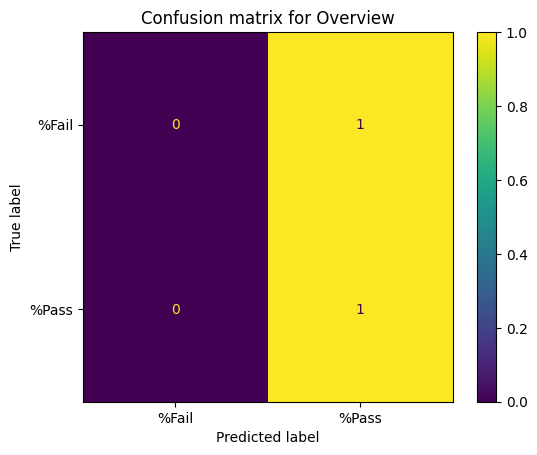

There are 14 Scopes in 14 submissions
3 Scope failed
11 Scope passed
Accuracy: 0.79
Precision: 0.79
Recall: 1.00
F1 score: 0.88


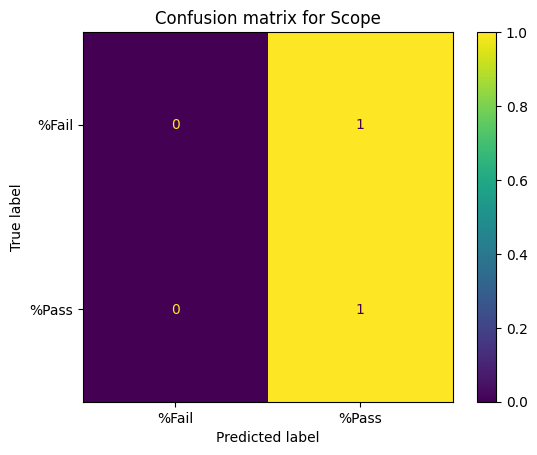

There are 14 Teams in 14 submissions
5 Team failed
9 Team passed
Accuracy: 0.71
Precision: 0.78
Recall: 0.78
F1 score: 0.78


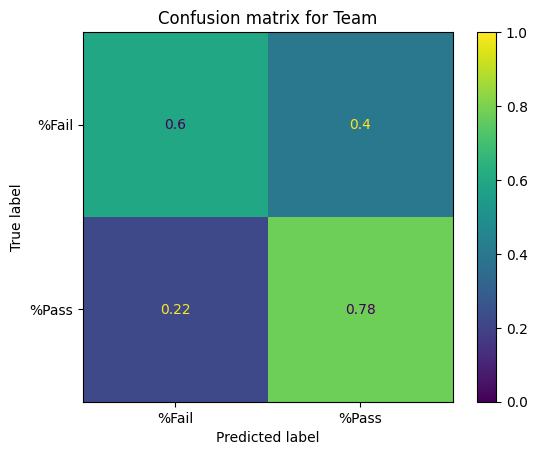

There are 14 Timelines in 14 submissions
4 Timeline failed
10 Timeline passed
Accuracy: 0.71
Precision: 0.71
Recall: 1.00
F1 score: 0.83


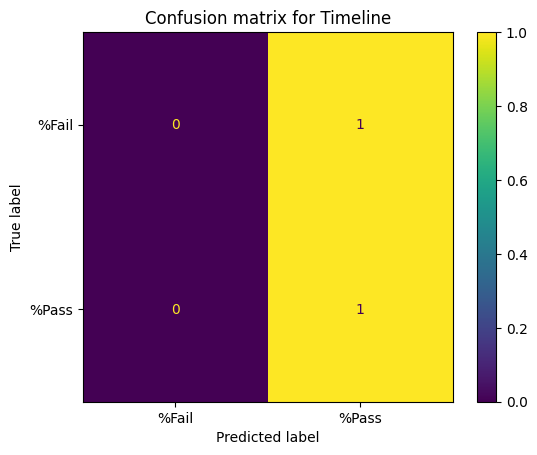

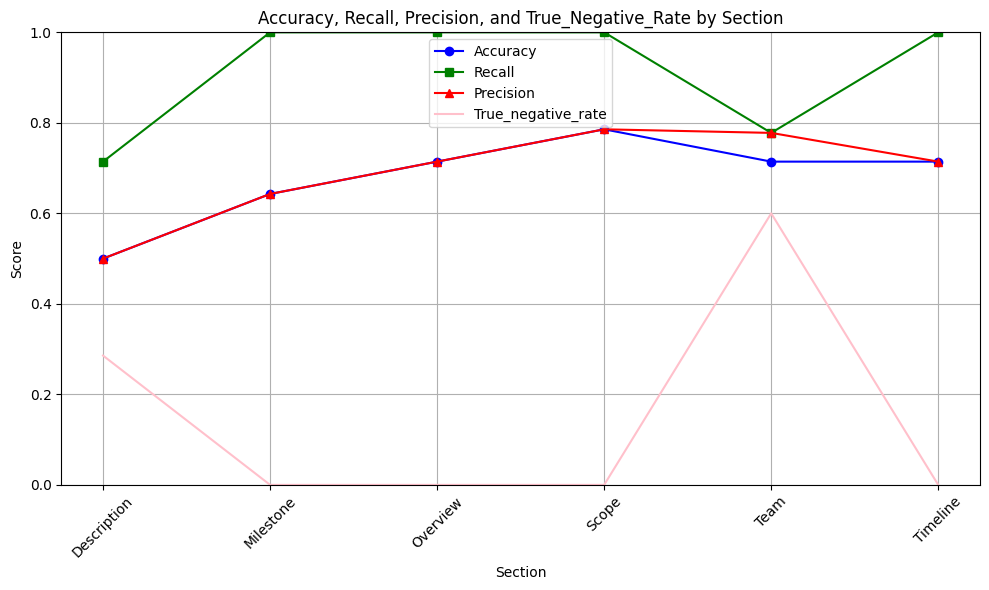

In [ ]:
test_result_section_v1 = EvaluateAIModel(training_result_df_v1)
test_result_section_v1.plot_confusion_matrix()
test_result_section_v1.visualize_all_sections()

Same_result
True     10
False     4
Name: count, dtype: int64


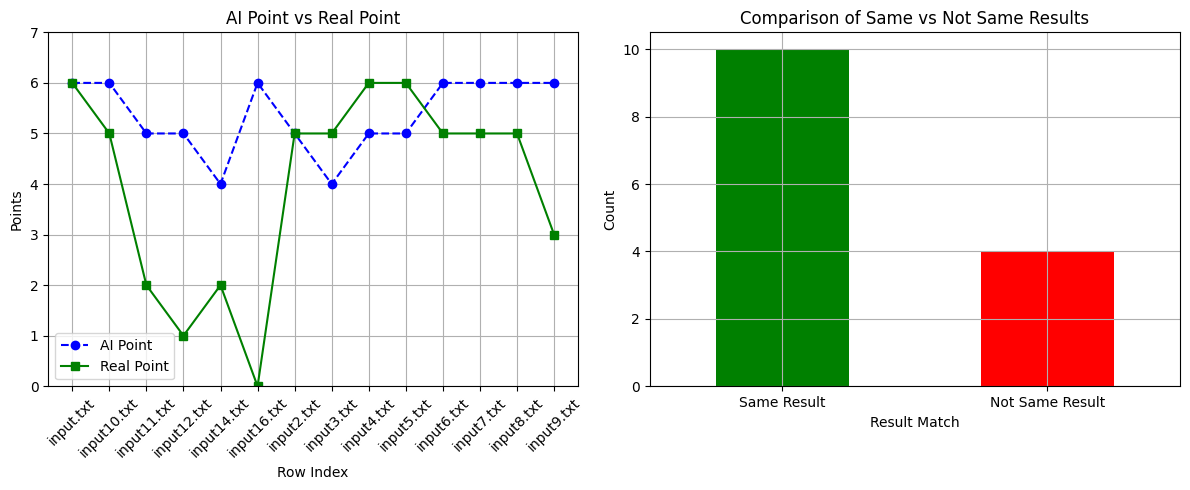

,filename,size,AI_point,Real_point,AI_result,Real_result,Same_result
0,input.txt,11,6,6,pass,pass,True
1,input10.txt,11,6,5,pass,pass,True
2,input11.txt,11,5,2,pass,fail,False
3,input12.txt,11,5,1,pass,fail,False
4,input14.txt,11,4,2,pass,fail,False
5,input16.txt,11,6,0,pass,fail,False
6,input2.txt,11,5,5,pass,pass,True
7,input3.txt,11,4,5,pass,pass,True
8,input4.txt,11,5,6,pass,pass,True
9,input5.txt,11,5,6,pass,pass,True


In [ ]:
grading_result_v1 = test_result_section_v1.get_submission_grading_accuracy()
grading_result_v1

# Next step idea
- Generate more prompts with ChatGPT to see how it's doing
- Evaluate the complexity of sentences
- 

# Park test result

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score


## Visualize the consistency of input 3

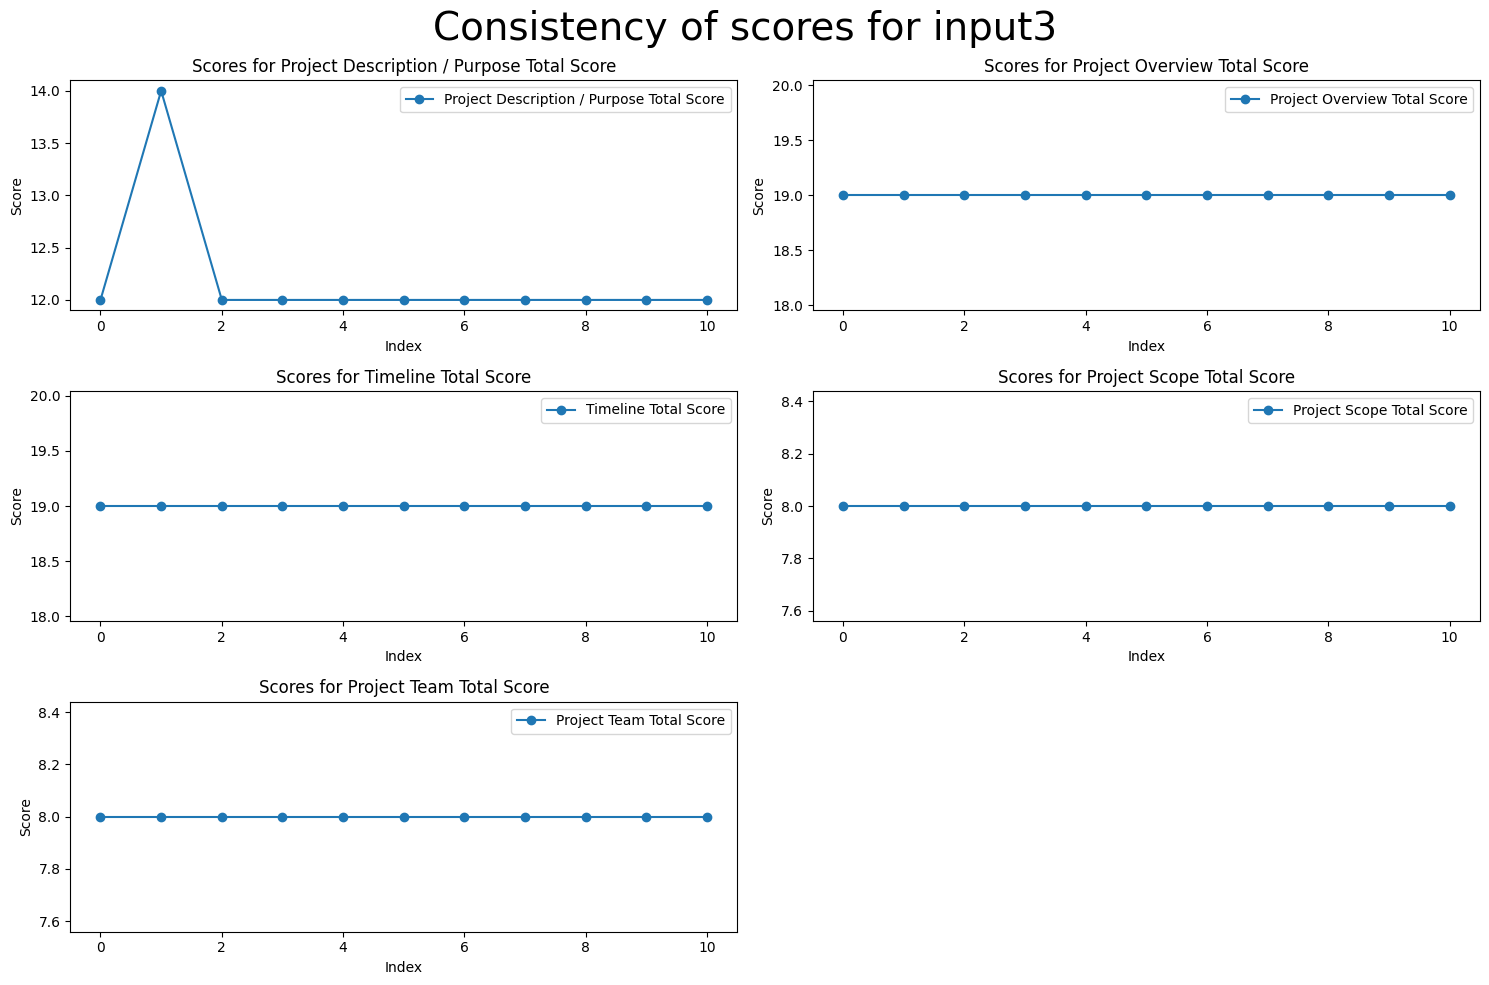

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
input3_consistency = pd.read_csv("test_results/Park test result/input3_consistency_test_result.csv")
input3_consistency['File Name'] = "input3"
# Extracting the relevant score columns
score_columns = [
    'Project Description / Purpose Total Score',
    'Project Overview Total Score',
    'Timeline Total Score',
    'Project Scope Total Score',
    'Project Team Total Score',
]

# Determine the grid size
n_cols = 2
n_rows = (len(score_columns) + 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(score_columns):
    ax = axes[i]
    ax.plot(input3_consistency.index, input3_consistency[column], marker='o', label=column)
    
    # Add labels and title
    ax.set_xlabel('Index')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for {column}')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Consistency of scores for input3", fontsize=28)

# Adjust layout
plt.tight_layout()

plt.show()

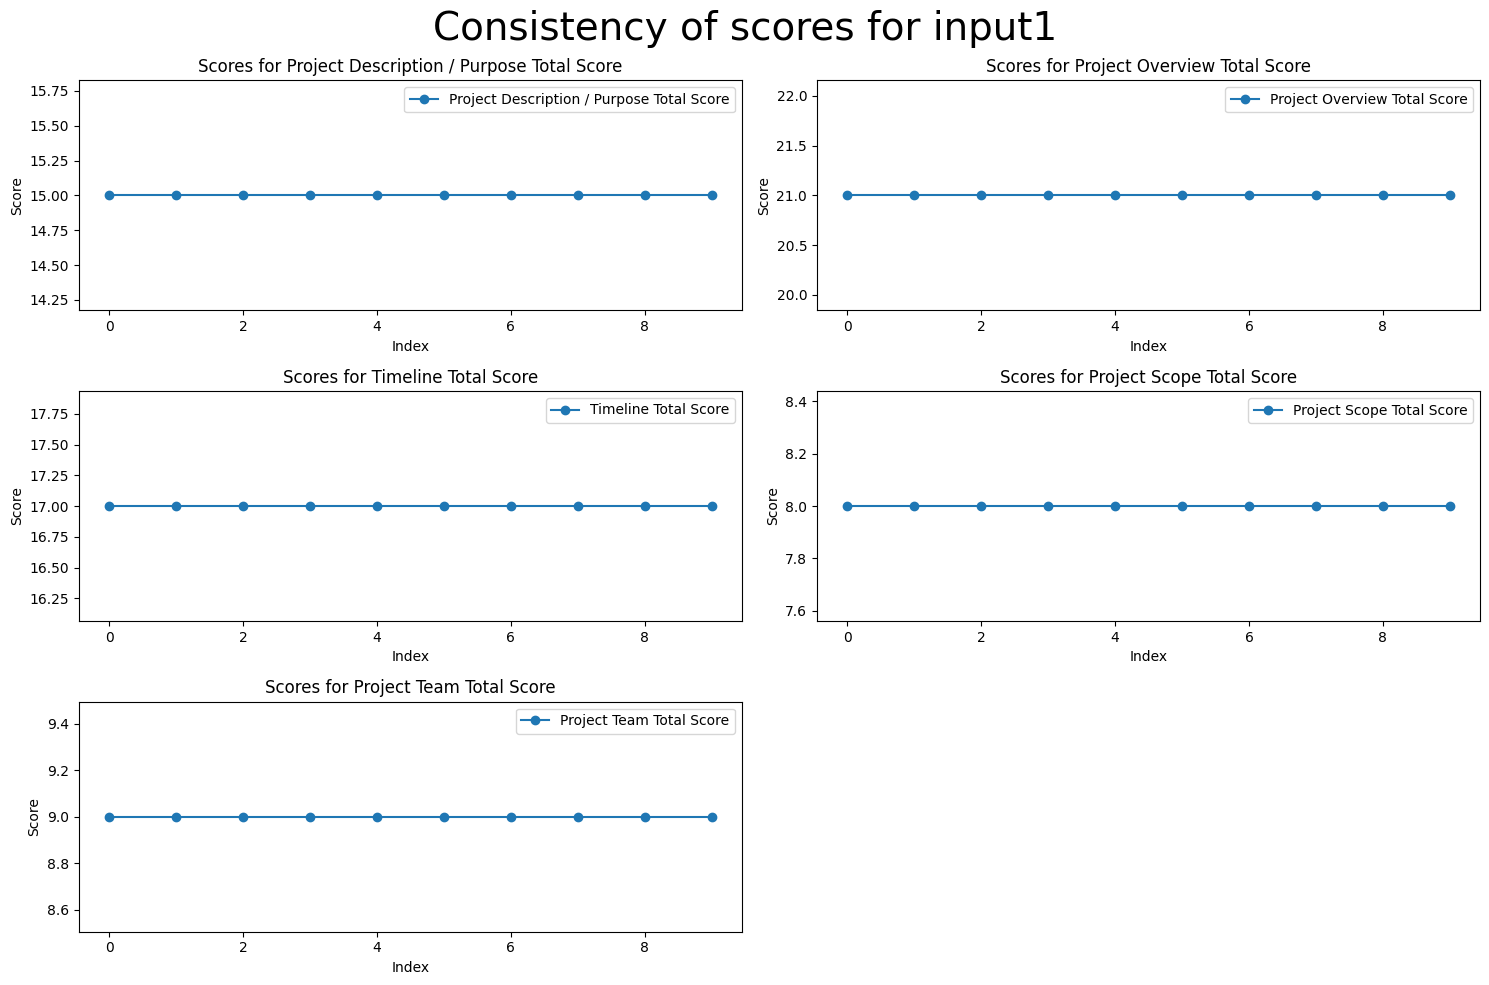

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
input3_consistency = pd.read_csv("test_results/consistency_input1.csv")
input3_consistency['File Name'] = "input3"
# Extracting the relevant score columns
score_columns = [
    'Project Description / Purpose Total Score',
    'Project Overview Total Score',
    'Timeline Total Score',
    'Project Scope Total Score',
    'Project Team Total Score',
]

# Determine the grid size
n_cols = 2
n_rows = (len(score_columns) + 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(score_columns):
    ax = axes[i]
    ax.plot(input3_consistency.index, input3_consistency[column], marker='o', label=column)
    
    # Add labels and title
    ax.set_xlabel('Index')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for {column}')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Consistency of scores for input1", fontsize=28)

# Adjust layout
plt.tight_layout()

plt.show()

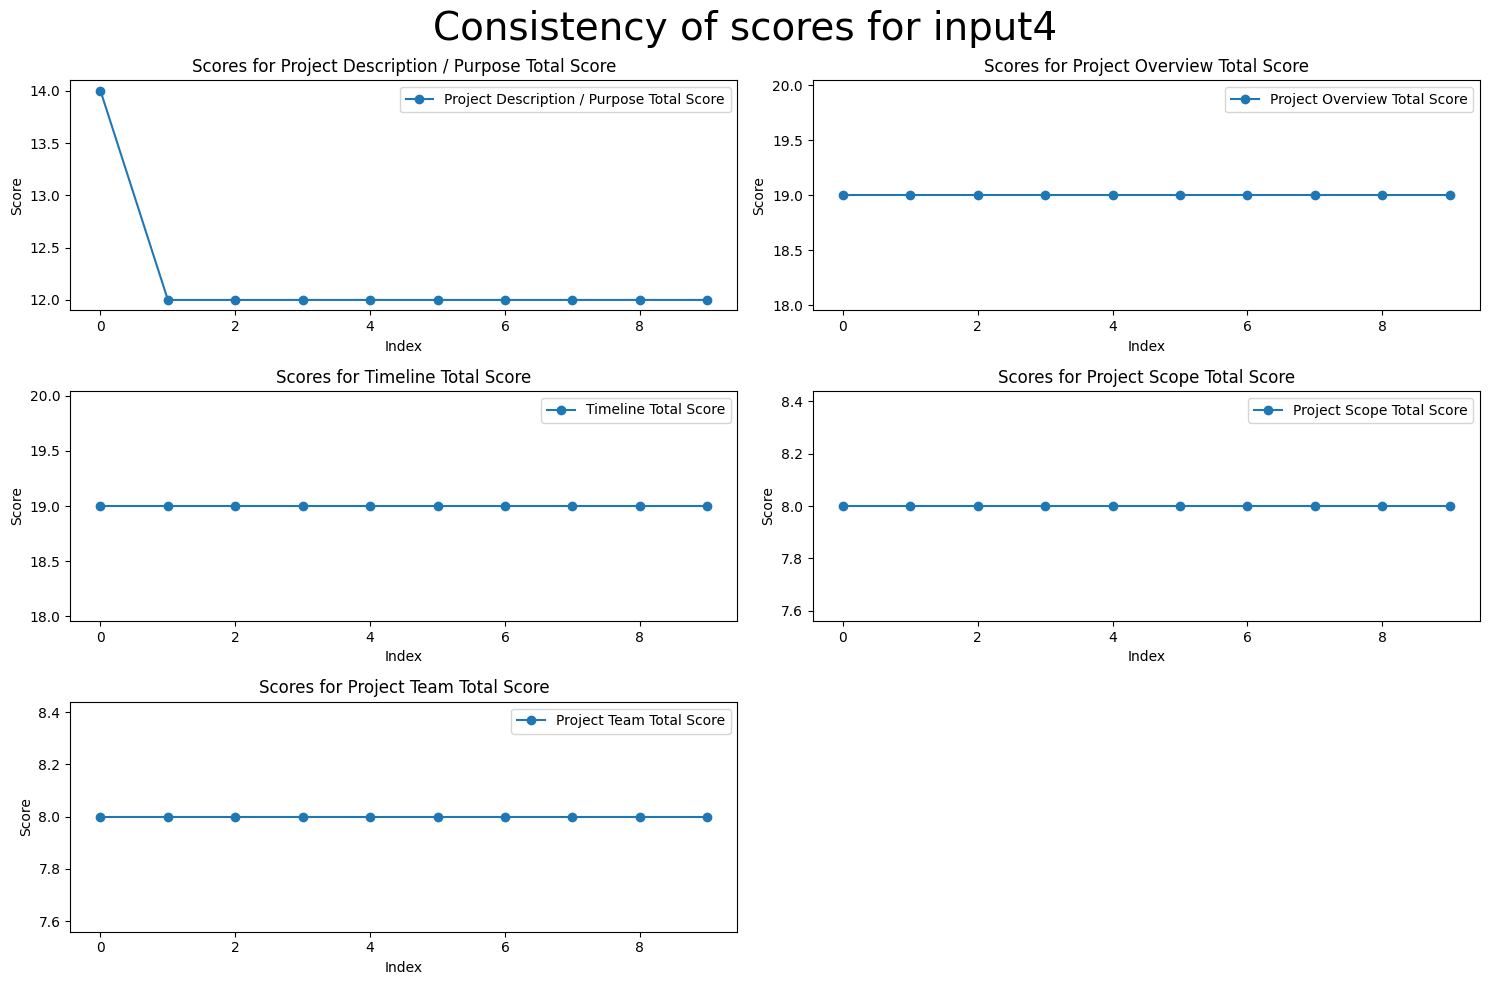

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
input3_consistency = pd.read_csv("test_results/consistency_input4.csv")
input3_consistency['File Name'] = "input3"
# Extracting the relevant score columns
score_columns = [
    'Project Description / Purpose Total Score',
    'Project Overview Total Score',
    'Timeline Total Score',
    'Project Scope Total Score',
    'Project Team Total Score',
]

# Determine the grid size
n_cols = 2
n_rows = (len(score_columns) + 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(score_columns):
    ax = axes[i]
    ax.plot(input3_consistency.index, input3_consistency[column], marker='o', label=column)
    
    # Add labels and title
    ax.set_xlabel('Index')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for {column}')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Consistency of scores for input4", fontsize=28)

# Adjust layout
plt.tight_layout()

plt.show()

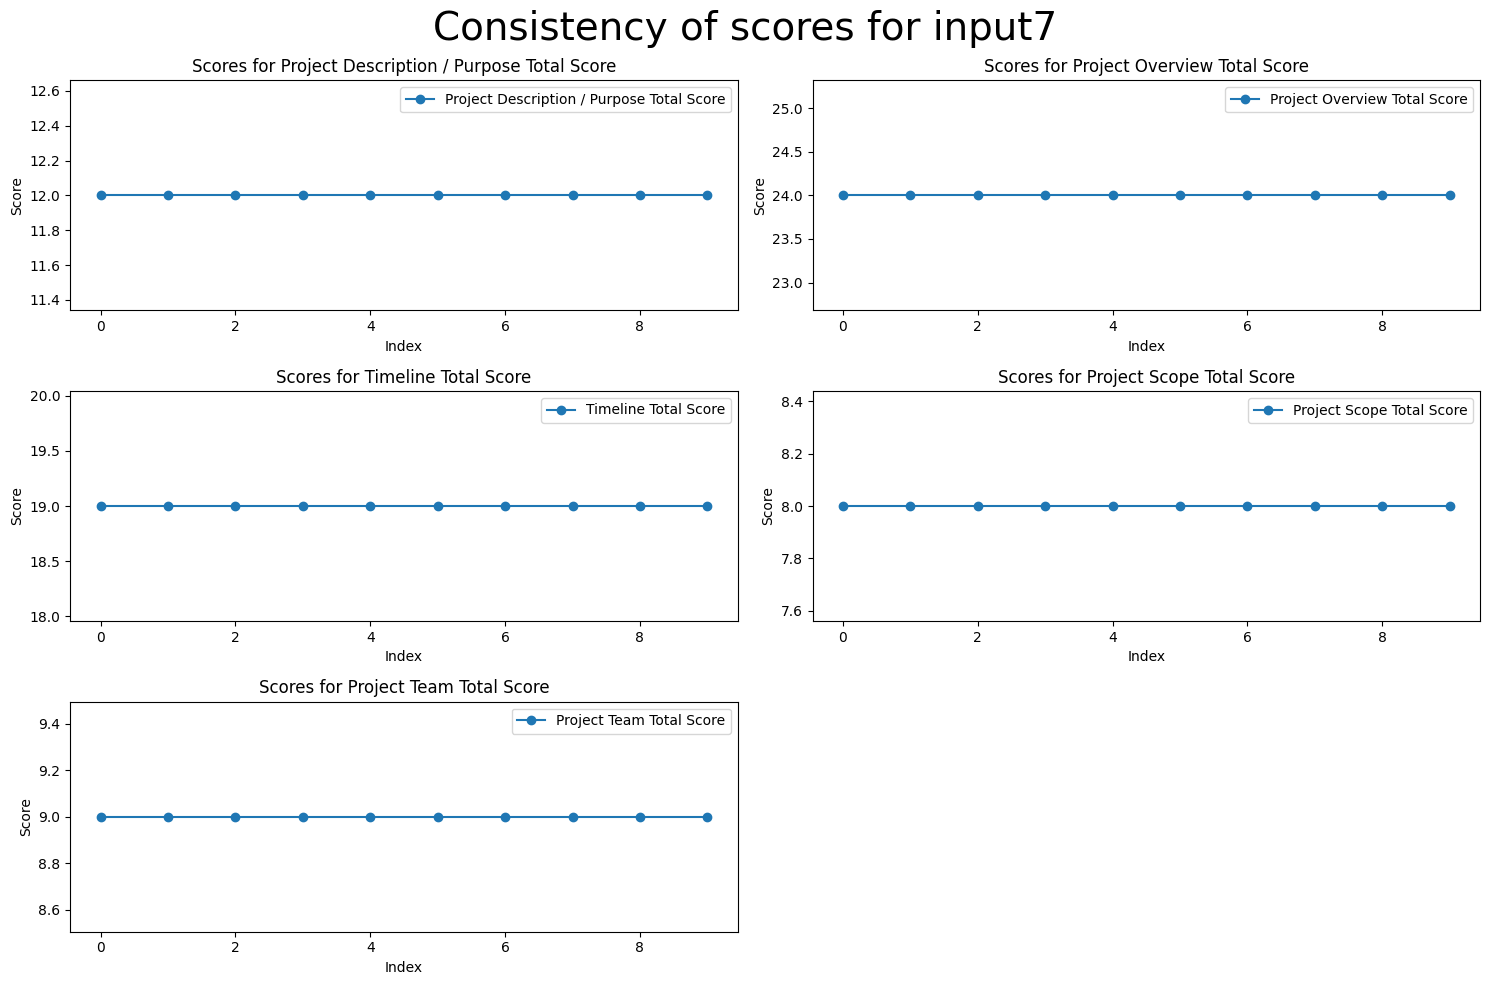

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
input3_consistency = pd.read_csv("test_results/consistency_input7.csv")
input3_consistency['File Name'] = "input3"
# Extracting the relevant score columns
score_columns = [
    'Project Description / Purpose Total Score',
    'Project Overview Total Score',
    'Timeline Total Score',
    'Project Scope Total Score',
    'Project Team Total Score',
]

# Determine the grid size
n_cols = 2
n_rows = (len(score_columns) + 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(score_columns):
    ax = axes[i]
    ax.plot(input3_consistency.index, input3_consistency[column], marker='o', label=column)
    
    # Add labels and title
    ax.set_xlabel('Index')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for {column}')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Consistency of scores for input7", fontsize=28)

# Adjust layout
plt.tight_layout()

plt.show()

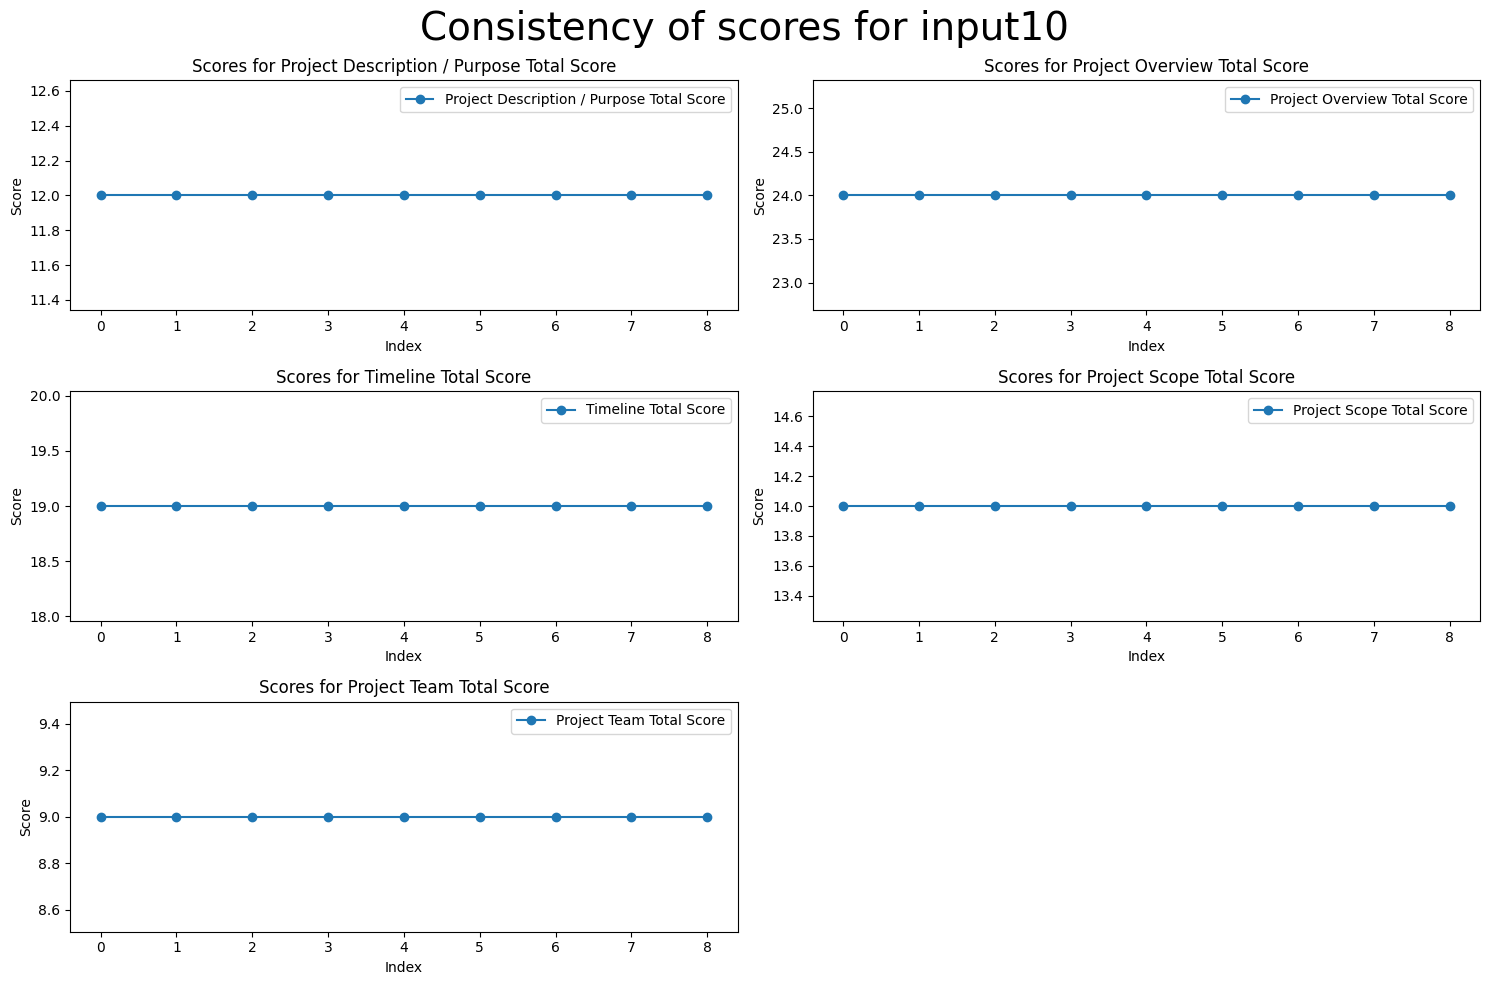

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
input3_consistency = pd.read_csv("test_results/consistency_input10.csv")
input3_consistency['File Name'] = "input3"
# Extracting the relevant score columns
score_columns = [
    'Project Description / Purpose Total Score',
    'Project Overview Total Score',
    'Timeline Total Score',
    'Project Scope Total Score',
    'Project Team Total Score',
]

# Determine the grid size
n_cols = 2
n_rows = (len(score_columns) + 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(score_columns):
    ax = axes[i]
    ax.plot(input3_consistency.index, input3_consistency[column], marker='o', label=column)
    
    # Add labels and title
    ax.set_xlabel('Index')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for {column}')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Consistency of scores for input10", fontsize=28)

# Adjust layout
plt.tight_layout()

plt.show()

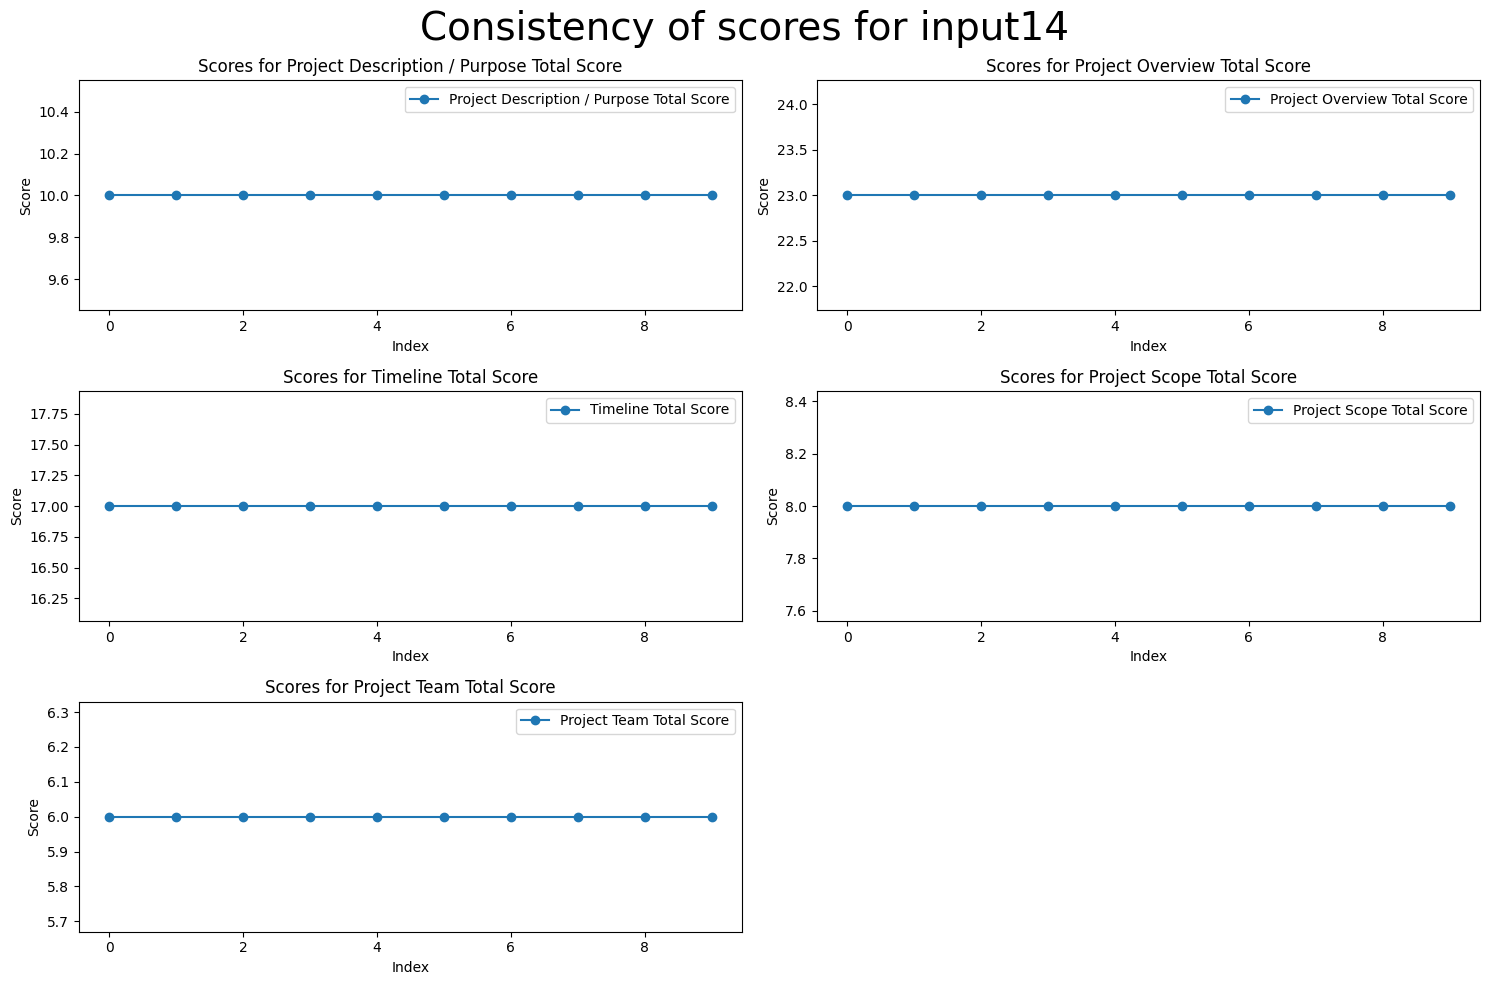

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
input3_consistency = pd.read_csv("test_results/consistency_input14.csv")
input3_consistency['File Name'] = "input3"
# Extracting the relevant score columns
score_columns = [
    'Project Description / Purpose Total Score',
    'Project Overview Total Score',
    'Timeline Total Score',
    'Project Scope Total Score',
    'Project Team Total Score',
]

# Determine the grid size
n_cols = 2
n_rows = (len(score_columns) + 1) // n_cols

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(score_columns):
    ax = axes[i]
    ax.plot(input3_consistency.index, input3_consistency[column], marker='o', label=column)
    
    # Add labels and title
    ax.set_xlabel('Index')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for {column}')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Consistency of scores for input14", fontsize=28)

# Adjust layout
plt.tight_layout()

plt.show()

## Read rubric .yml file